# Validació de clusterings

A partir del startingPoint1.ipynb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_completeness_v_measure, normalized_mutual_info_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import pdist

In [2]:
df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis=1)

In [3]:
df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]

In [4]:
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

pca = PCA(n_components=0.95)

pca.fit(df_num_scaled)

pca_features = pca.transform(df_num_scaled)

## KMeans

In [5]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
clusters = model.fit_predict(pca_features)

c:\Users\MLi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception in thread Thread-6:
Traceback (most recent call last):
  File "c:\Users\MLi\anaconda3\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "c:\Users\MLi\anaconda3\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\MLi\anaconda3\lib\subprocess.py", line 1479, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\MLi\anaconda3\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
c:\Users\MLi\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find t

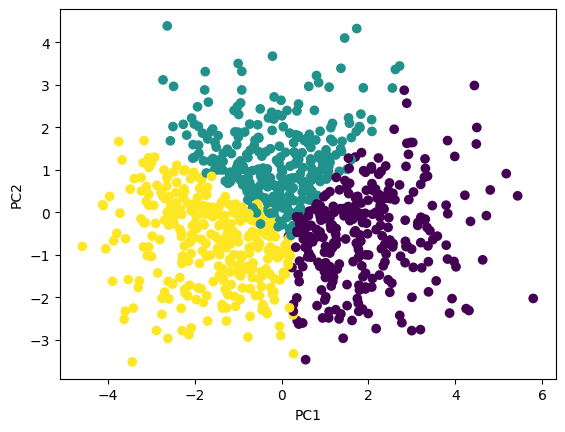

In [6]:
plt.scatter(pca_features[:,0], pca_features[:,1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [7]:
silhouette_avg = silhouette_score(pca_features, clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.12747803609155797


Valors entre -1 i 1

In [8]:
inertia = model.inertia_
print("Inèrcia (WCSS):",inertia)

Inèrcia (WCSS): 6973.013085617769


Es busca minimitzar la mètrica de la inèrcia, que mesura la suma de les distàncies quadrades entre els punts de dades i els centroides dels seus clústers assignats, reflectint la dispersió dins dels clústers.

In [9]:
bcss = pca_features.shape[0] * (pca_features.mean(axis=0)**2).sum() - inertia
print("BCSS:",bcss)

BCSS: -6973.013085617769


Es busca maximitzar la mètrica de BCSS

In [10]:
true_labels = df['mbi_ea'] # Triem rendiment acadèmic
ari = adjusted_rand_score(true_labels, clusters)
print("Índex d'Adjustament Rand (ARI):", ari)

Índex d'Adjustament Rand (ARI): 0.031674567615833656


Valors entre -1 i 1, volem aconseguir el valor més proper a 1

In [11]:
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(true_labels, clusters)
print("Homogeneïtat:", homogeneity)
print("Completitud:",completeness)
print("V-Measure:", v_measure)

Homogeneïtat: 0.08574264409555112
Completitud: 0.2288473091051466
V-Measure: 0.12474634473980806


In [12]:
nmi = normalized_mutual_info_score(true_labels, clusters)
print("Informació Mutua Normalitzada (NMI):",nmi)

Informació Mutua Normalitzada (NMI): 0.12474634473980806


Adjusted Mutual Information (AMI) és una mètrica que mesura la similitud entre dues particions de dades, ajustada per tenir en compte les coincidències aleatòries. En el context de l'agrupament, AMI compara la similitud entre els clústers predits per un algoritme d'agrupament i els clústers reals (si estan disponibles).

* Si el valor d'AMI és proper a 1, vol dir que les particions són molt semblants.
* Si el valor d'AMI és proper a 0, implica que no hi ha més similitud entre les particions del que s'esperaria a l'atzar.

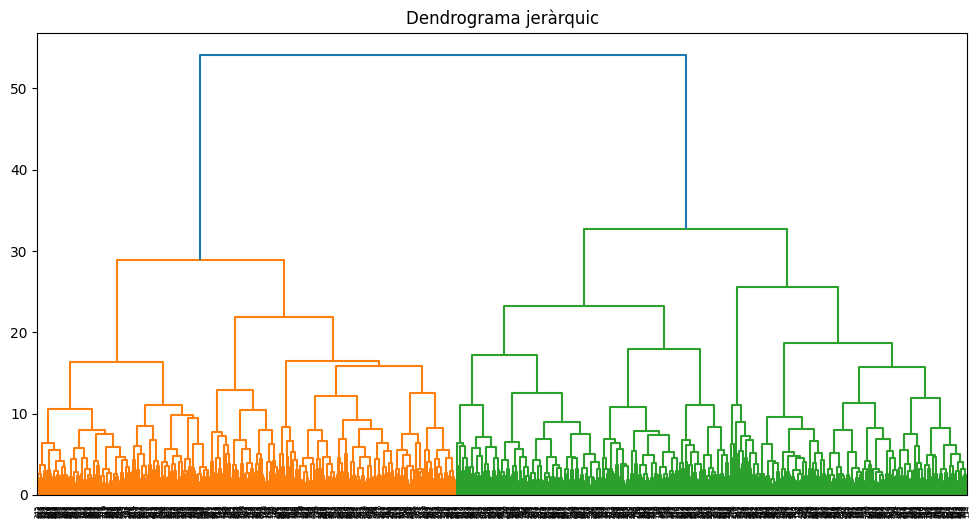

Correlació de Cophenetic: 0.32136766743139944


In [13]:
Z = linkage(pca_features, method='ward')
c, coph_dists = cophenet(Z, pdist(pca_features))

plt.figure(figsize=(12, 6))
plt.title('Dendrograma jeràrquic')
dendrogram(Z)
plt.show()

print("Correlació de Cophenetic:",c)

In [14]:
db_index = davies_bouldin_score(pca_features, clusters)
print("Índex Davies-Bouldin:",db_index)

Índex Davies-Bouldin: 2.0959346515373944


Un valor baix en aquest index indica un millor qualitat dels clústers

In [15]:
ch_index = calinski_harabasz_score(pca_features, clusters)
print("Índex de Calinski-Harabasz:",ch_index)

Índex de Calinski-Harabasz: 161.0758370915926


Un valor alt en aquest çindex indica un millor qualitat dels clústers.

## Gaussian Mixture

In [16]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3)
clusters = model.fit_predict(pca_features)

In [17]:
silhouette_avg = silhouette_score(pca_features, clusters)
print("Silhouette Score:", silhouette_avg) # valors entre -1 i 1

Silhouette Score: 0.10612413356177748


In [18]:
inertia = model.inertia_
print("Inèrcia (WCSS):", inertia) # volem minimitzar

AttributeError: 'GaussianMixture' object has no attribute 'inertia_'

In [30]:
lb = model.lower_bound_
print("Lower bound:", lb ) # volem maximitzar

Lower bound: -13.00637222437959


_lower bound_ és el valor del límit inferior de la log-versemblança de les dades d'entrenament respecte al model ajustat de la millor manera possible mitjançant l'algorisme EM. Aquest valor del límit inferior és utilitzat com una mesura per avaluar què tan bé el model s'ajusta a les dades durant l'entrenament. En el context de la barreja gaussiana i l'EM, maximitzar aquest límit inferior durant el procés iteratiu de l'algorisme ajuda a trobar els paràmetres òptims del model.

In [35]:
import numpy as np

cluster_labels = model.predict(pca_features)
cluster_centers = model.means_
bcss = np.sum(np.linalg.norm(pca_features - cluster_centers[cluster_labels], axis=1)**2)

print("BCSS:", bcss) # volem maximitzar

BCSS: 8068.535522706206


In [23]:
true_labels = df['mbi_ea'] # Triem rendiment acadèmic
ari = adjusted_rand_score(true_labels, clusters)
print("Índex d'Adjustament Rand (ARI):", ari) # valors entre -1 i 1

Índex d'Adjustament Rand (ARI): 0.01523388336748569


In [24]:
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(true_labels, clusters)
print("Homogeneïtat:", homogeneity)
print("Completitud:",completeness)
print("V-Measure:", v_measure)

Homogeneïtat: 0.03938389258562656
Completitud: 0.128855512733719
V-Measure: 0.06032869247175208


In [25]:
nmi = normalized_mutual_info_score(true_labels, clusters)
print("Informació Mutua Normalitzada (NMI):",nmi)

Informació Mutua Normalitzada (NMI): 0.060328692471752085


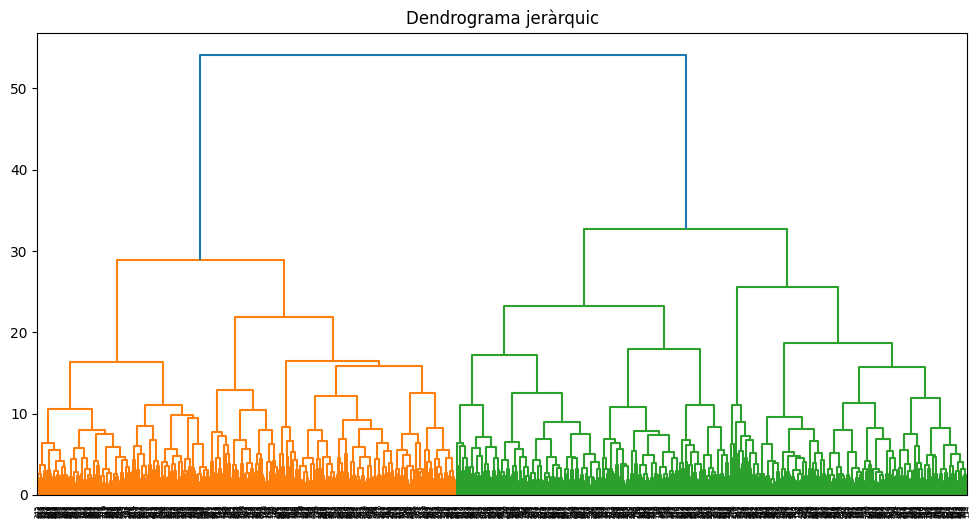

Correlació de Cophenetic: 0.32136766743139944


In [26]:
Z = linkage(pca_features, method='ward')
c, coph_dists = cophenet(Z, pdist(pca_features))

plt.figure(figsize=(12, 6))
plt.title('Dendrograma jeràrquic')
dendrogram(Z)
plt.show()

print("Correlació de Cophenetic:",c)

In [27]:
db_index = davies_bouldin_score(pca_features, clusters)
print("Índex Davies-Bouldin:",db_index) # volem valor baix (signe qualitat)

Índex Davies-Bouldin: 2.5275382792962136


In [28]:
ch_index = calinski_harabasz_score(pca_features, clusters)
print("Índex de Calinski-Harabasz:",ch_index) # volem valor alt (signe qualitat)

Índex de Calinski-Harabasz: 84.01534536084434


## Spectral Clustering

In [36]:
from sklearn.cluster import SpectralClustering

model_sc = SpectralClustering(n_clusters=3)
clusters = model.fit_predict(pca_features)

In [37]:
silhouette_avg = silhouette_score(pca_features, clusters)
print("Silhouette Score:", silhouette_avg) # valors entre -1 i 1

Silhouette Score: 0.10945513686094707


In [38]:
inertia = model.inertia_
print("Inèrcia (WCSS):",inertia) # volem minimitzar

AttributeError: 'GaussianMixture' object has no attribute 'inertia_'

In [ ]:
bcss = pca_features.shape[0] * (pca_features.mean(axis=0)**2).sum() - inertia
print("BCSS:",bcss) # volem maximitzar

In [39]:
true_labels = df['mbi_ea'] # Triem rendiment acadèmic
ari = adjusted_rand_score(true_labels, clusters)
print("Índex d'Adjustament Rand (ARI):", ari) # valors entre -1 i 1

Índex d'Adjustament Rand (ARI): 0.0158225425159901


In [40]:
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(true_labels, clusters)
print("Homogeneïtat:", homogeneity)
print("Completitud:",completeness)
print("V-Measure:", v_measure)

Homogeneïtat: 0.046951406139807764
Completitud: 0.15217573712865026
V-Measure: 0.07176183739972969


In [41]:
nmi = normalized_mutual_info_score(true_labels, clusters)
print("Informació Mutua Normalitzada (NMI):",nmi)

Informació Mutua Normalitzada (NMI): 0.0717618373997297


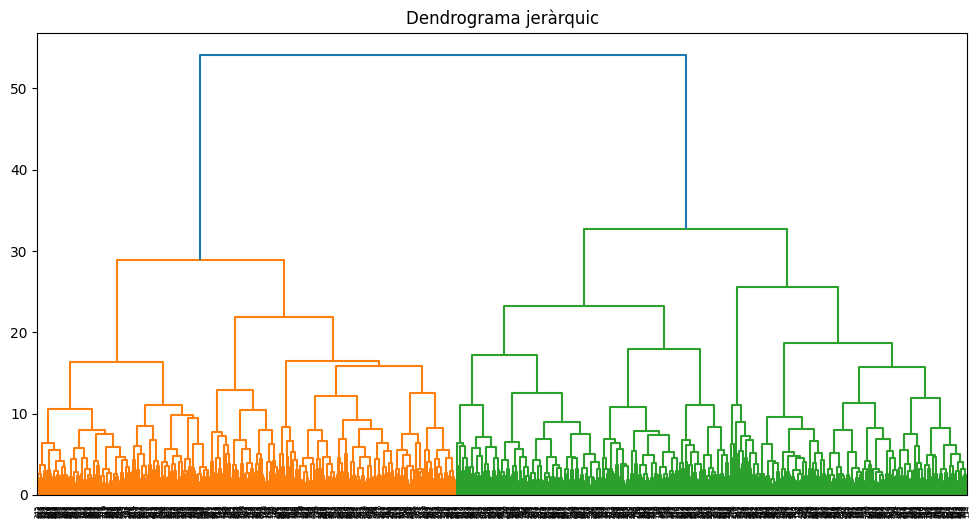

Correlació de Cophenetic: 0.32136766743139944


In [42]:
Z = linkage(pca_features, method='ward')
c, coph_dists = cophenet(Z, pdist(pca_features))

plt.figure(figsize=(12, 6))
plt.title('Dendrograma jeràrquic')
dendrogram(Z)
plt.show()

print("Correlació de Cophenetic:",c)

In [43]:
db_index = davies_bouldin_score(pca_features, clusters)
print("Índex Davies-Bouldin:", db_index) # volem valor baix (signe qualitat)

Índex Davies-Bouldin: 2.604679830529896


In [44]:
ch_index = calinski_harabasz_score(pca_features, clusters)
print("Índex de Calinski-Harabasz:", ch_index) # volem valor alt (signe qualitat)

Índex de Calinski-Harabasz: 74.59204016243768
